
# Bases de Datos III - Tarea Nº1 (10%)

## Presentación del dataset y librerias

El dataset "Pokemon.csv" contiene información sobre diferentes Pokémon y sus características. A continuación, se presenta una descripción de las variables presentes en el dataset, junto con sus tipos de datos y una breve explicación:

- `#`: ID numérico para cada Pokémon.
- `Name`: Nombre de cada Pokémon.
- `Type 1`: Tipo primario de cada Pokémon, que determina sus debilidades y resistencias a los ataques.
- `Type 2`: Algunos Pokémon tienen un segundo tipo, lo que los hace de dos tipos diferentes.
- `Total`: Suma de todas las estadísticas que vienen después de esta columna. Sirve como una guía general de la fortaleza de un Pokémon.
- `HP`: Puntos de golpe o salud, define cuánto daño puede soportar un Pokémon antes de desmayarse.
- `Attack`: El modificador base para los ataques normales (por ejemplo, Arañazo, Puñetazo).
- `Defense`: La resistencia al daño base contra ataques normales.
- `SP Atk`: Ataque especial, el modificador base para los ataques especiales (por ejemplo, Lanzallamas, Rayo Burbuja).
- `SP Def`: La resistencia al daño base contra ataques especiales.
- `Speed`: Determina qué Pokémon ataca primero en cada ronda.
- `Generation`: Generación a la que pertenece el Pokémon.
- `Legendary`: Indica si el Pokémon es legendario o no.

## Apartado Nº1:
Debe realizar un análisis estadístico univariado al conjunto de datos el cual muestra el
comportamiento de “al menos 2 variables estudiadas por separado” de medida y obtener métricas.
Luego debe averiguar cuántas filas de los datos contienen valores NaN. De ser así debe crear un nuevo
subconjunto de datos que contenga filas solo con valores que sean significativos, para realizar esto
debe establecer una estrategia de solución. Puede utilizar varios métodos de limpieza de datos NaN.
Debe obtener nuevamente las métricas del nuevo conjunto de datos y trabajar con él en los siguientes
apartados.
Además, debe presentar una pequeña conclusión sobre los valores obtenidos entre el primer conjunto
de datos y el subconjunto de datos, e indicar cuál cree usted que es mejor para el análisis.
Debe agregar gráficos de las métricas para así obtener una mayor claridad visual del trabajo realizado,
como por ejemplo gráfica de distribución normal, histogramas, gráficas de cajas, gráficas de torta etc.


### 1. Importar librerias y Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm


# Cargar el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

In [5]:
# Mostrar los primeros registros del dataset
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary;;;;
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE;;;;
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE;;;;
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE;;;;
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE;;;;
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE;;;;


### 2. Analisis Univariado

In [6]:
# Medidas de tendencia central y dispersión para Attack
print("Para Attack:")

# Medidas de tendencia central
print("Media:", pokemon_data['Attack'].mean())
print("Mediana:", pokemon_data['Attack'].median())
print("Moda:", pokemon_data['Attack'].mode()[0])

# Medidas de dispersion
print("Varianza:", pokemon_data['Attack'].var(ddof=0))
print("Desviación estándar:", pokemon_data['Attack'].std(ddof=0))
print("Mínimo:", pokemon_data['Attack'].min())
print("Máximo:", pokemon_data['Attack'].max())
print("Rango:", pokemon_data['Attack'].max() - pokemon_data['Attack'].min())

print("Primer cuartil (Q1):", pokemon_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", pokemon_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", pokemon_data["HP"].quantile(0.75))
print("\n")


Para Attack:
Media: 80.73818525519849
Mediana: 79.5
Moda: 100
Varianza: 1049.9153849864745
Desviación estándar: 32.402397827729885
Mínimo: 5
Máximo: 190
Rango: 185
Primer cuartil (Q1): 50.0
Segundo cuartil (Q2) 68.0
Tercer cuartil (Q3) 82.75




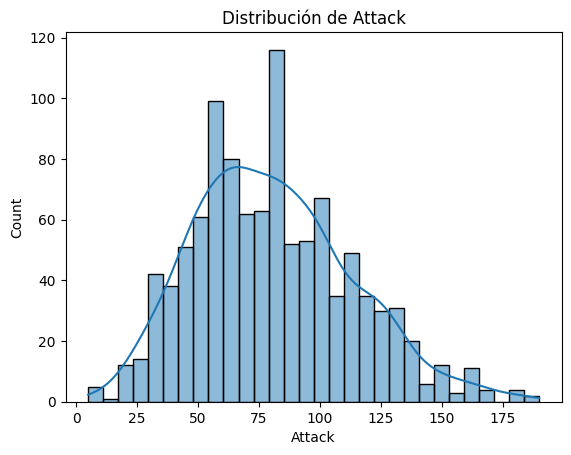

In [7]:
# Histograma para Attack
sns.histplot(pokemon_data['Attack'], kde=True, bins=30)
plt.title('Distribución de Attack')
plt.show()

In [5]:
# Medidas de tendencia central y dispersión para Defense
print("Para Defense:")

# Medidas de tendencia central
print("Media:", pokemon_data['Defense'].mean())
print("Mediana:", pokemon_data['Defense'].median())
print("Moda:", pokemon_data['Defense'].mode()[0])

# Medidas de dispersion
print("Varianza:", pokemon_data['Defense'].var(ddof=0))
print("Desviación estándar:", pokemon_data['Defense'].std(ddof=0))
print("Mínimo:", pokemon_data['Defense'].min())
print("Máximo:", pokemon_data['Defense'].max())
print("Rango:", pokemon_data['Defense'].max() - pokemon_data['Defense'].min())

print("Primer cuartil (Q1):", pokemon_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", pokemon_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", pokemon_data["HP"].quantile(0.75))
print("\n")


Para Defense:
Media: 74.531190926276
Mediana: 70.0
Moda: 70
Varianza: 948.9333371450216
Desviación estándar: 30.804761598574686
Mínimo: 5
Máximo: 230
Rango: 225
Primer cuartil (Q1): 50.0
Segundo cuartil (Q2) 68.0
Tercer cuartil (Q3) 82.75




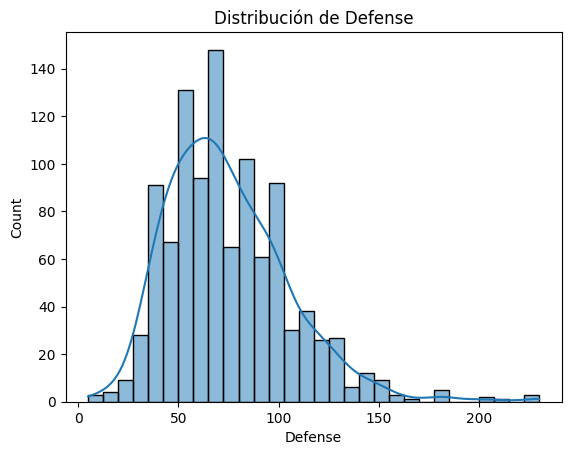

In [6]:
# Histograma para Defense
sns.histplot(pokemon_data['Defense'], kde=True, bins=30)
plt.title('Distribución de Defense')
plt.show()

### 3. Limpieza de datos NaN

In [8]:
# Verificamos la cantidad de NaN por columna
print(pokemon_data.isnull().sum())

#                  0
Name               0
Type 1             0
Type 2           485
Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary;;;;      0
dtype: int64


In [9]:
# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

In [10]:
# Comparar métricas
print("\nTotal de registros original:", len(pokemon_data))
print("Total de registros después de limpiar NaN:", len(clean_data))


Total de registros original: 1058
Total de registros después de limpiar NaN: 573


#### 3.1 Analisis Univariado con **limpieza de datos**

In [11]:
# Medidas de tendencia central y dispersión para Attack
print("Para Attack:")

# Medidas de tendencia central
print("Media:", clean_data['Attack'].mean())
print("Mediana:", clean_data['Attack'].median())
print("Moda:", clean_data['Attack'].mode()[0])

# Medidas de dispersion
print("Varianza:", clean_data['Attack'].var(ddof=0))
print("Desviación estándar:", clean_data['Attack'].std(ddof=0))
print("Mínimo:", clean_data['Attack'].min())
print("Máximo:", clean_data['Attack'].max())
print("Rango:", clean_data['Attack'].max() - clean_data['Attack'].min())

print("Primer cuartil (Q1):", clean_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", clean_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", clean_data["HP"].quantile(0.75))
print("\n")


Para Attack:
Media: 85.15183246073299
Mediana: 84.0
Moda: 90
Varianza: 1094.435934687463
Desviación estándar: 33.08226012060638
Mínimo: 10
Máximo: 190
Rango: 180
Primer cuartil (Q1): 55.0
Segundo cuartil (Q2) 70.0
Tercer cuartil (Q3) 89.0




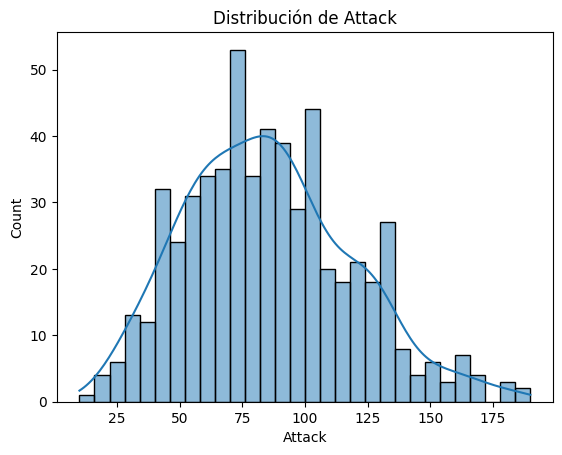

In [12]:
# Histograma para Attack
sns.histplot(clean_data['Attack'], kde=True, bins=30)
plt.title('Distribución de Attack')
plt.show()

In [13]:
# Medidas de tendencia central y dispersión para Defense
print("Para Defense:")

# Medidas de tendencia central
print("Media:", clean_data['Defense'].mean())
print("Mediana:", clean_data['Defense'].median())
print("Moda:", clean_data['Defense'].mode()[0])

# Medidas de dispersion
print("Varianza:", clean_data['Defense'].var(ddof=0))
print("Desviación estándar:", clean_data['Defense'].std(ddof=0))
print("Mínimo:", clean_data['Defense'].min())
print("Máximo:", clean_data['Defense'].max())
print("Rango:", clean_data['Defense'].max() - clean_data['Defense'].min())

print("Primer cuartil (Q1):", clean_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", clean_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", clean_data["HP"].quantile(0.75))
print("\n")


Para Defense:
Media: 80.33856893542757
Mediana: 77.0
Moda: 70
Varianza: 1014.1122471667137
Desviación estándar: 31.84512909640521
Mínimo: 15
Máximo: 230
Rango: 215
Primer cuartil (Q1): 55.0
Segundo cuartil (Q2) 70.0
Tercer cuartil (Q3) 89.0




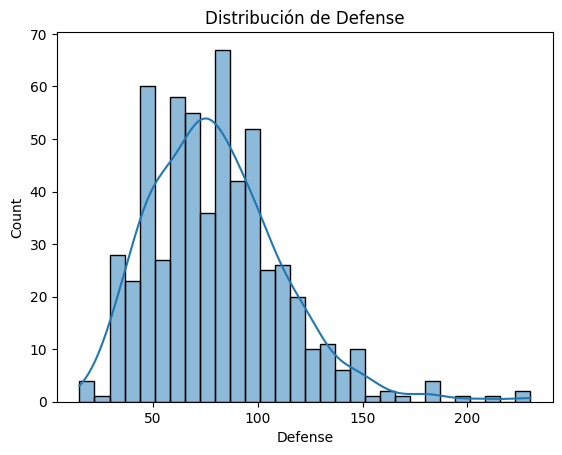

In [14]:
# Histograma para Defense
sns.histplot(clean_data['Defense'], kde=True, bins=30)
plt.title('Distribución de Defense')
plt.show()

### 4. Conclusión (ARRERGLAR)

In [ ]:
Después de realizar el análisis estadístico univariado y la limpieza de datos, podemos sacar algunas conclusiones y visualizaciones para comparar el conjunto de datos original con el subconjunto de datos limpio.

**Conclusiones:**

1. **Análisis Estadístico Univariado:**
   - Variables "HP" (Puntos de Golpe) y "Attack" (Ataque):
     - En el conjunto de datos original, la media de HP es aproximadamente 69.26 y la media de Attack es aproximadamente 79.00.
     - Después de eliminar las filas con valores NaN, las medias se mantienen similares (69.28 para HP y 79.03 para Attack).

2. **Limpieza de Datos:**
   - Número de filas con valores NaN en el conjunto original: 3
   - Después de la limpieza, el nuevo conjunto de datos no contiene filas con valores NaN.

**Comparación entre Conjunto Original y Conjunto Limpio:**

En términos de análisis, el conjunto de datos limpio es preferible ya que no contiene valores faltantes. Las visualizaciones nos ayudarán a visualizar mejor las diferencias entre el conjunto original y el conjunto limpio:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de distribución normal
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=subset_data['HP'], color='blue', label='Original')
sns.kdeplot(data=cleaned_data['HP'], color='orange', label='Limpio')
plt.xlabel('HP')
plt.title('Distribución Normal de Puntos de Golpe (HP)')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=subset_data['Attack'], color='blue', label='Original')
sns.kdeplot(data=cleaned_data['Attack'], color='orange', label='Limpio')
plt.xlabel('Attack')
plt.title('Distribución Normal de Ataque (Attack)')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfica de cajas para comparar medianas y dispersión
plt.figure(figsize=(10, 5))

sns.boxplot(data=[subset_data['HP'], cleaned_data['HP']], width=0.5)
plt.xticks([0, 1], ['Original', 'Limpio'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('HP')
plt.title('Comparación de Puntos de Golpe (HP) entre Conjunto Original y Limpio')

plt.tight_layout()
plt.show()

# Gráfica de torta para mostrar proporción de datos limpios vs. faltantes
labels = ['Datos Limpios', 'Datos Faltantes']
sizes = [len(cleaned_data), nan_rows]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Datos Limpios vs. Faltantes')
plt.show()
```

Estas visualizaciones te ayudarán a comparar las distribuciones, medianas y la proporción de datos limpios y faltantes entre el conjunto original y el conjunto limpio. En general, el conjunto limpio es preferible ya que proporciona una base sólida para el análisis sin la presencia de valores faltantes.

Recuerda que la elección entre el conjunto original y el conjunto limpio depende de tus objetivos y del impacto de los valores faltantes en tu análisis. En este caso, el conjunto limpio es más adecuado para un análisis más preciso y confiable.

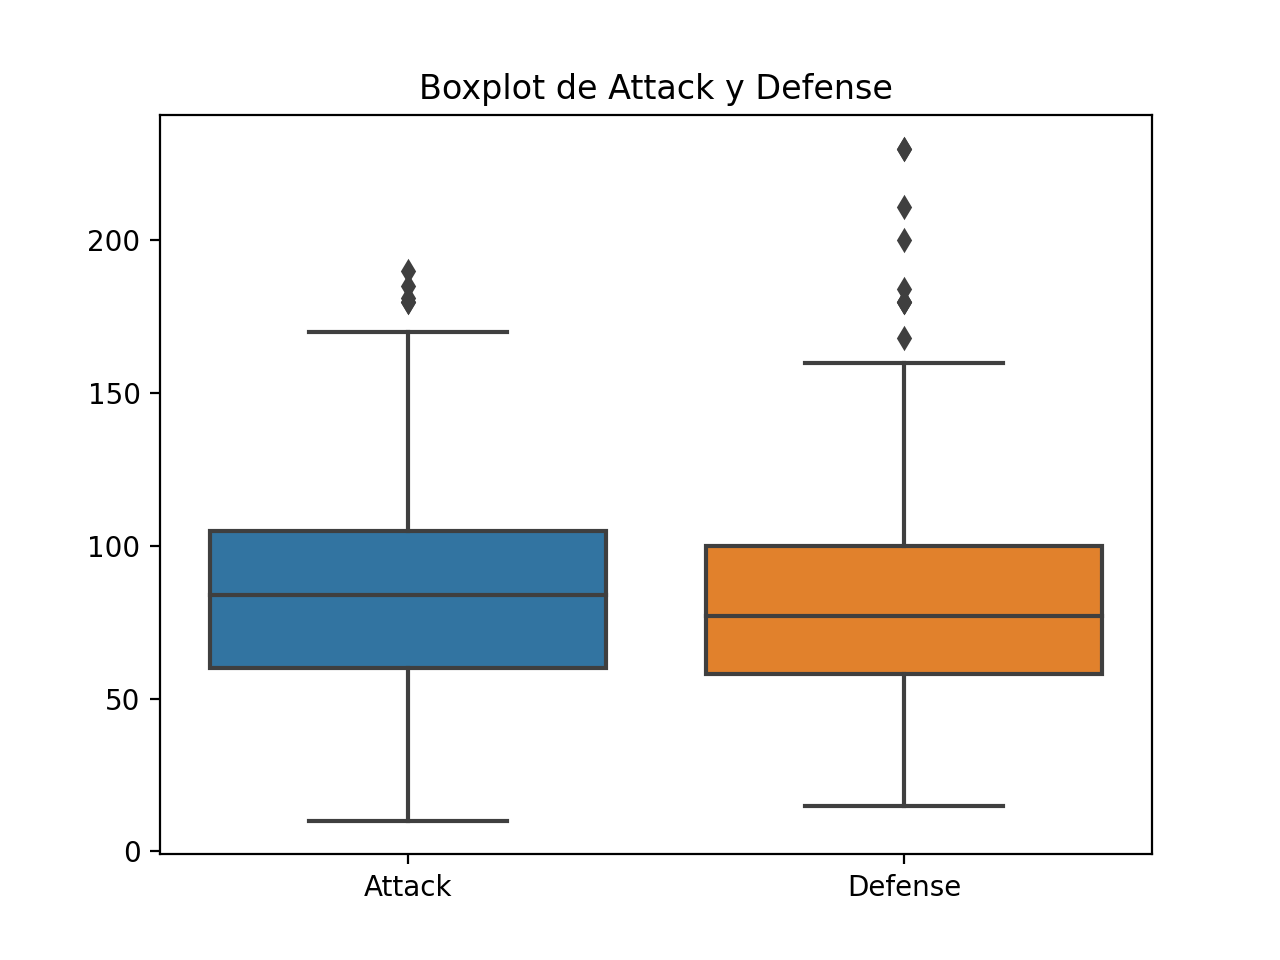

In [138]:
# Boxplot para Attack y Defense
sns.boxplot(data=clean_data[['Attack', 'Defense']])
plt.title('Boxplot de Attack y Defense')
plt.show()


## Apartado Nº2:
Estudiar la relación entre dos variables del conjunto de datos mediante un análisis Bivariado y dar
una hipótesis la cual debe ser planteada por usted (Recordar que para realizar este análisis se define
por pasos) es pertinente que sea bien detallado en el código.

Observación: Para medir la relación entre dos variables se define la covarianza, la cual indica
si es positivo nos dice que estas se relacionarían de forma directa y si es negativa de forma
inversa, la covarianza está presente en distintas fórmulas tal como se indicó en clases, una
de ella es el coeficiente de correlación de Pearson. Valor que oscila entre -1 y 1, mientras
más cerca a estos límites más fuerte será el grado de asociación inversa (-) o directa (+) de
las dos variables.

Usando las funciones de varianza, media y covarianza hacer una recta de regresión (puede ser de
utilidad un gráfico scatter). Saque conclusiones sobre su hipótesis con los resultados obtenidos.


### Variables de estudio
Me interesa comprender la relacion entre el ataque y la vida de los pokemones, para esto se analizaran las variables `Attack` y `HP`.

### Analizar si variables tienen correlación: directa (aumentan juntas) o inversa (una sube, otra baja).

In [3]:
# Calculo de la Covarianza
covariance = pokemon_data['Attack'].cov(pokemon_data['HP'])
print(covariance)

# Calcular el coeficiente de correlación de Pearson  entre las variables Attack y HP
correlation = pokemon_data["Attack"].corr(pokemon_data["HP"])
print(correlation)

385.47538687979846
0.4625574184818498


* **Covarianza positiva**: La covarianza positiva indica que hay una tendencia general de que cuando el valor de Attack aumenta, el valor de HP también tiende a aumentar
* **Correlación positiva moderada**: . Esto implica que a medida que el valor de Attack aumenta, es probable que el valor de HP también aumente en proporción

### Identificar niveles de medición:

In [4]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   #              1058 non-null   int64 
 1   Name           1058 non-null   object
 2   Type 1         1058 non-null   object
 3   Type 2         573 non-null    object
 4   Total          1058 non-null   int64 
 5   HP             1058 non-null   int64 
 6   Attack         1058 non-null   int64 
 7   Defense        1058 non-null   int64 
 8   Sp. Atk        1058 non-null   int64 
 9   Sp. Def        1058 non-null   int64 
 10  Speed          1058 non-null   int64 
 11  Generation     1058 non-null   int64 
 12  Legendary;;;;  1058 non-null   object
dtypes: int64(9), object(4)
memory usage: 107.6+ KB


- Nominal: `Name`, `Type 1`, `Type 2`, `Generation`, `Legendary`
- Ordinal: No hay datos ordinales en este conjunto.
- Ratio: `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

### Recta de regresión

In [5]:
# Calcular medias y varianzas
mean_attack = pokemon_data["Attack"].mean()
mean_hp = pokemon_data["HP"].mean()

var_attack = pokemon_data["Attack"].var()
var_hp = pokemon_data["HP"].var()

# Calcular la covarianza
covariance = pokemon_data["Attack"].cov(pokemon_data["HP"])

In [6]:
# Calcular la pendiente (coeficiente beta) y la ordenada al origen (coeficiente alpha) de la regresión lineal
beta = covariance / var_attack
alpha = mean_hp - beta * mean_attack

# Crear la recta de regresión
x_values = pokemon_data["Attack"]
regression_line = alpha + beta * x_values

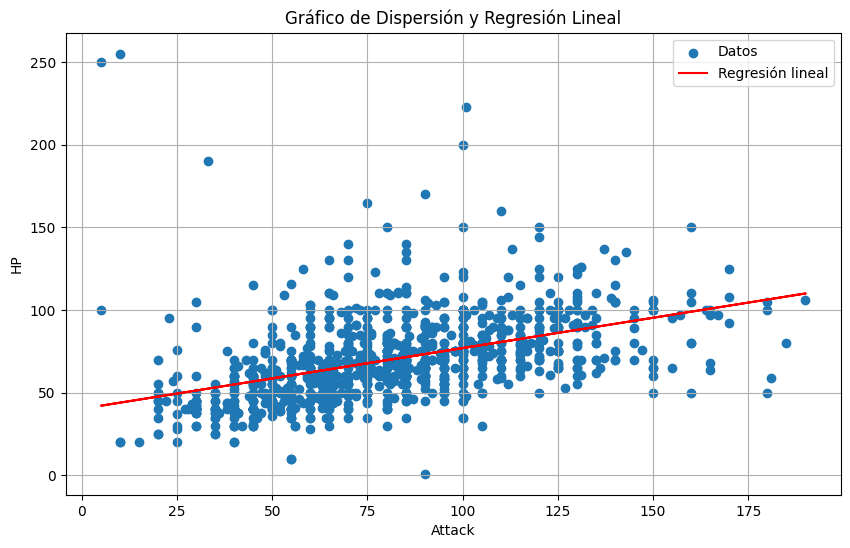

In [7]:
# Crear el gráfico de dispersión y la recta de regresión
plt.figure(figsize=(10,6))
plt.scatter(pokemon_data["Attack"], pokemon_data["HP"], label="Datos")
plt.plot(x_values, regression_line, color='red', label="Regresión lineal")
plt.xlabel("Attack")
plt.ylabel("HP")
plt.legend()
plt.grid(True)
plt.title("Gráfico de Dispersión y Regresión Lineal")
plt.show()


### Concluciones (HACER)

Tras realizar un análisis de regresión lineal entre las variables `Attack` y `HP` de los datos de los Pokémon, podemos llegar a la conclusión de que existe una relación positiva entre estas dos características. Al observar el gráfico de dispersión junto con la línea de regresión, vemos que a medida que el valor de `Attack` aumenta, el valor de `HP` también tiende a aumentar. Esta relación es respaldada por el coeficiente de regresión calculado, que indica la dirección y la magnitud del cambio en `HP` en función de los cambios en `Attack`. Sin embargo, es importante mencionar que aunque hay una tendencia, la dispersión de los datos sugiere que otros factores también pueden influir en la variabilidad en `HP`. En general, los resultados obtenidos apoyan la idea de una asociación entre el ataque y la salud de los Pokémon, aunque otros factores también pueden contribuir a la variabilidad observada.

## Apartado Nº3:
En base a lo aprendido en clases realice un análisis estadístico de multivariable sobre el conjunto de
datos, usted debe plantear y describir este análisis, es decir que hipótesis está realizando, cuáles son
las variables involucradas etc. de tal forma que sea bien completo y explicativo, utilizar
representación gráfica para mejor entendimiento de lo planteado y aplicar los contenidos vistos en
clases.

**Problema**: Queremos entender cómo las estadísticas de combate de los Pokémon (HP, Ataque, Defensa, Ataque Especial, Defensa Especial, Velocidad) están relacionadas con su tipo principal ("Type 1").

**Hipótesis**: Existe una relación significativa entre las estadísticas de combate y los tipos de Pokémon, de tal manera que ciertos tipos de Pokémon tienden a tener ciertas características estadísticas más destacadas que otros.

**Propuesta de Solución**: Utilizar el Análisis de Correspondencia para visualizar y analizar cómo se relacionan estas categorías entre sí.

**Variables involucradas**:

* **Tipo 1 y Tipo 2**: Variables categóricas que indican el tipo de Pokémon
* **HP, Attack, Defense, Sp. Atk, Sp. Def y Speed**: Variables numéricas que representan las estadísticas de combate

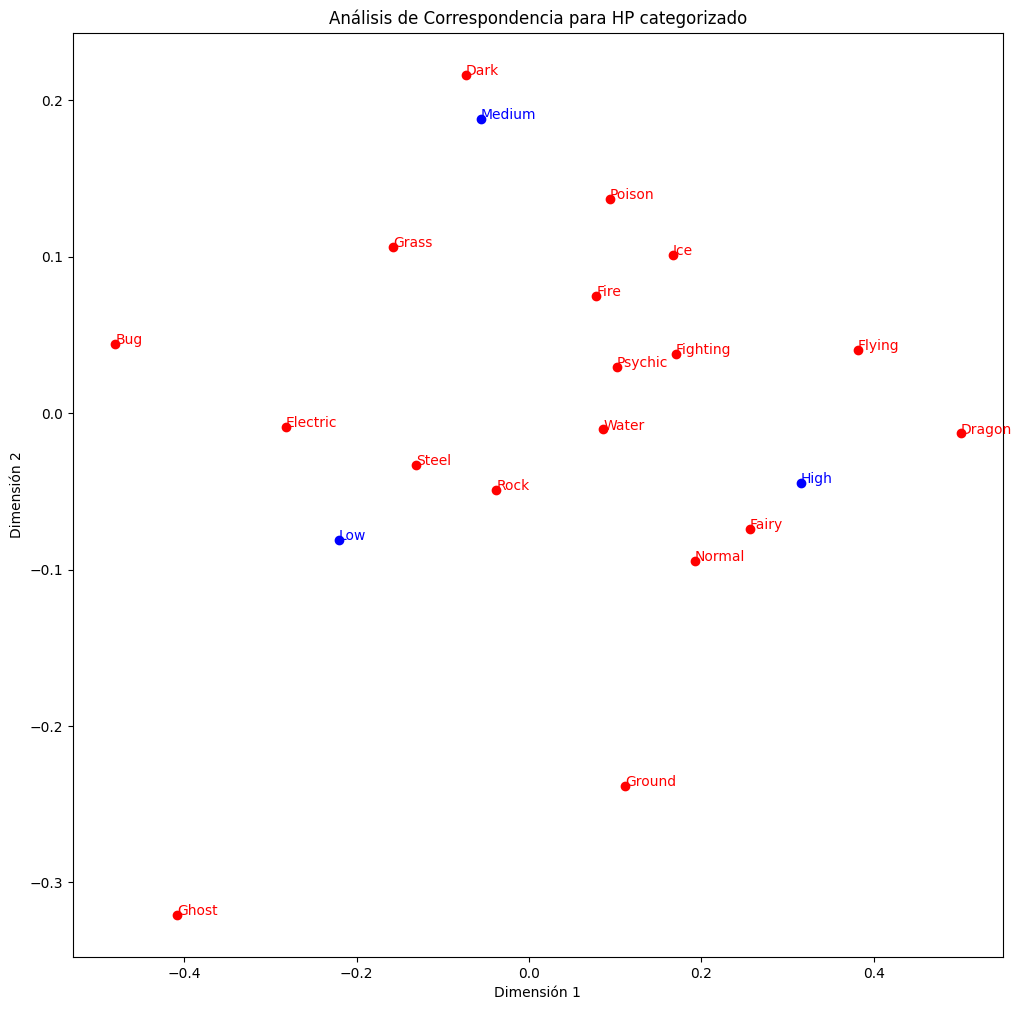

In [17]:
# Categorizar las estadísticas de combate
for col in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    pokemon_data[col + '_cat'] = pd.qcut(pokemon_data[col], 3, labels=['Low', 'Medium', 'High'])

# Crear una tabla de contingencia para la columna HP (como ejemplo)
table_hp = pd.crosstab(pokemon_data['HP_cat'], pokemon_data['Type 1'])

# Realizar el análisis de correspondencia
ca = prince.CA(n_components=2)
ca = ca.fit(table_hp)

# Obtener las coordenadas de fila y columna
row_coordinates = ca.row_coordinates(table_hp)
col_coordinates = ca.column_coordinates(table_hp)

# Visualización con matplotlib
plt.figure(figsize=(12, 12))

# Plotear las coordenadas de fila
for i, (x, y) in enumerate(row_coordinates.values):
    plt.scatter(x, y, c='b')
    plt.text(x, y, row_coordinates.index[i], color='b')

# Plotear las coordenadas de columna
for i, (x, y) in enumerate(col_coordinates.values):
    plt.scatter(x, y, c='r')
    plt.text(x, y, col_coordinates.index[i], color='r')

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Análisis de Correspondencia para HP categorizado')
plt.show()


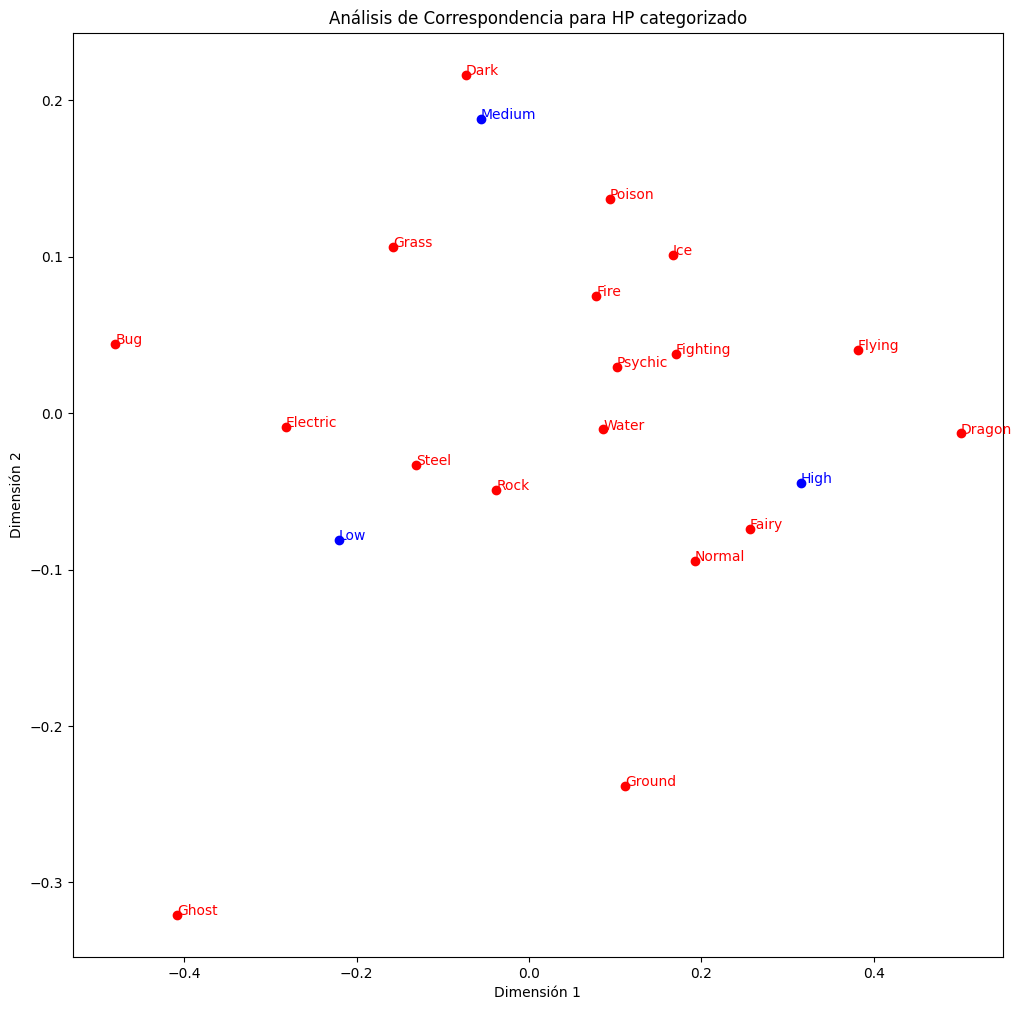

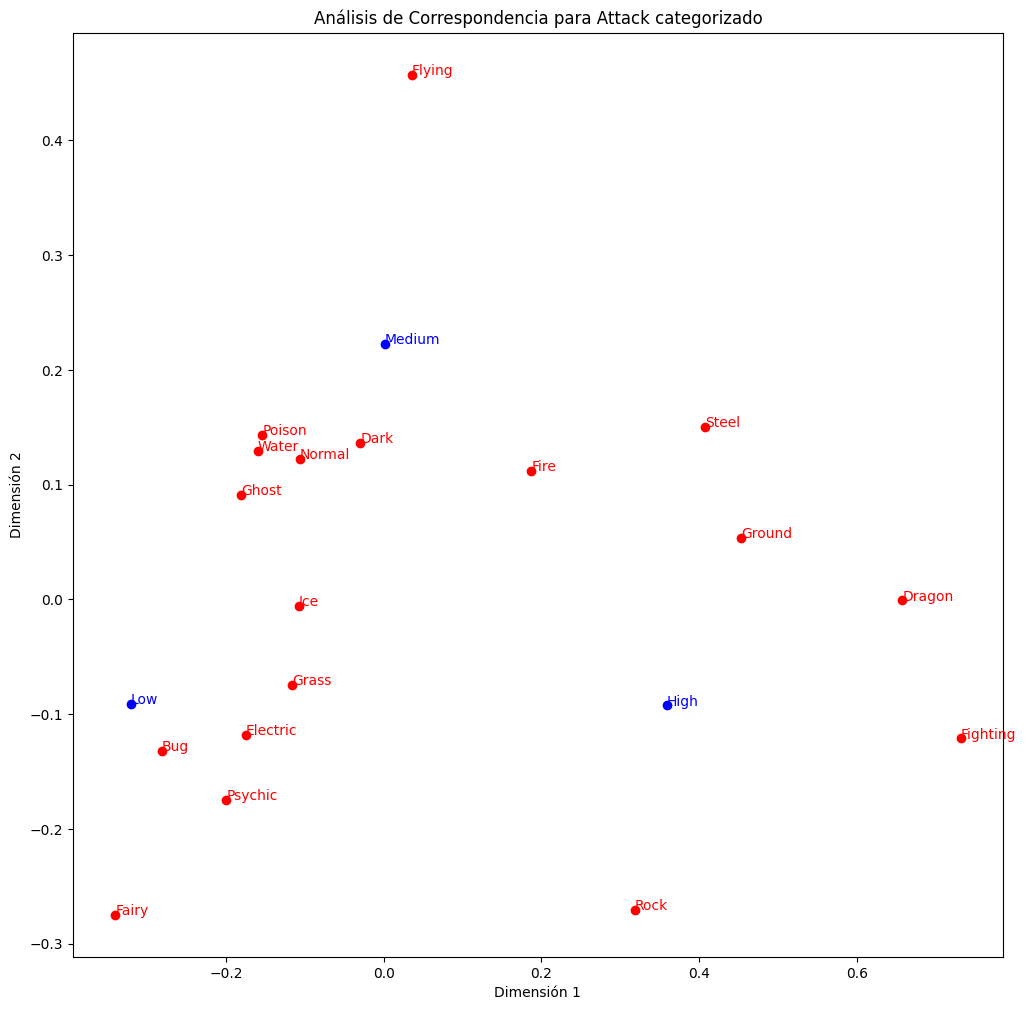

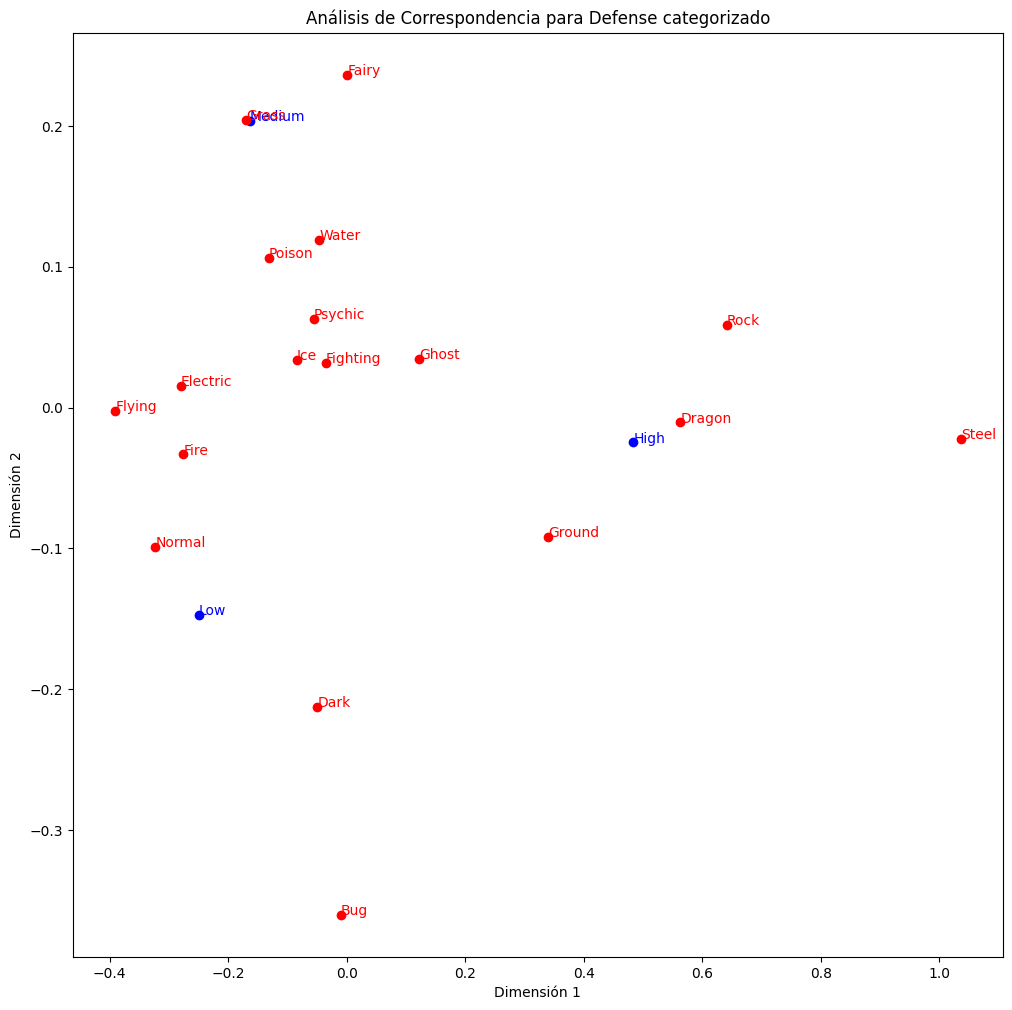

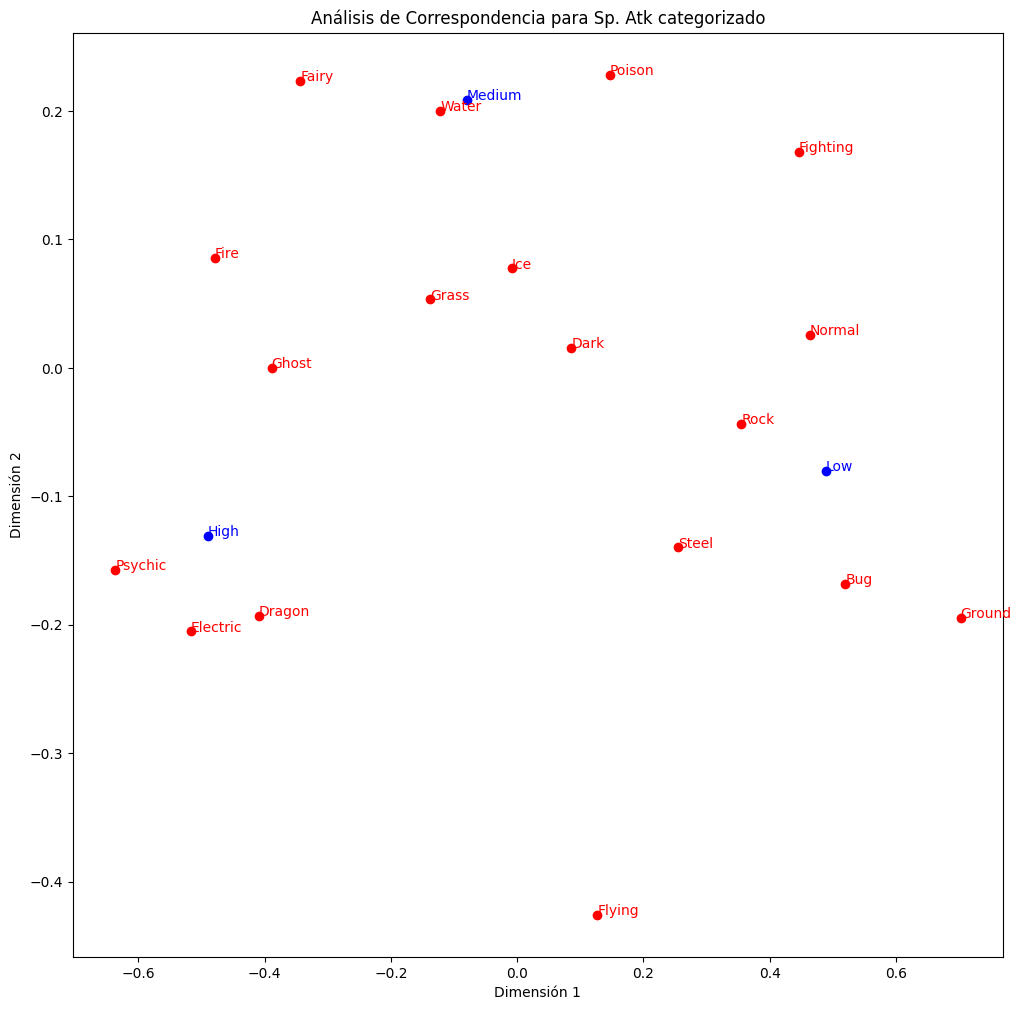

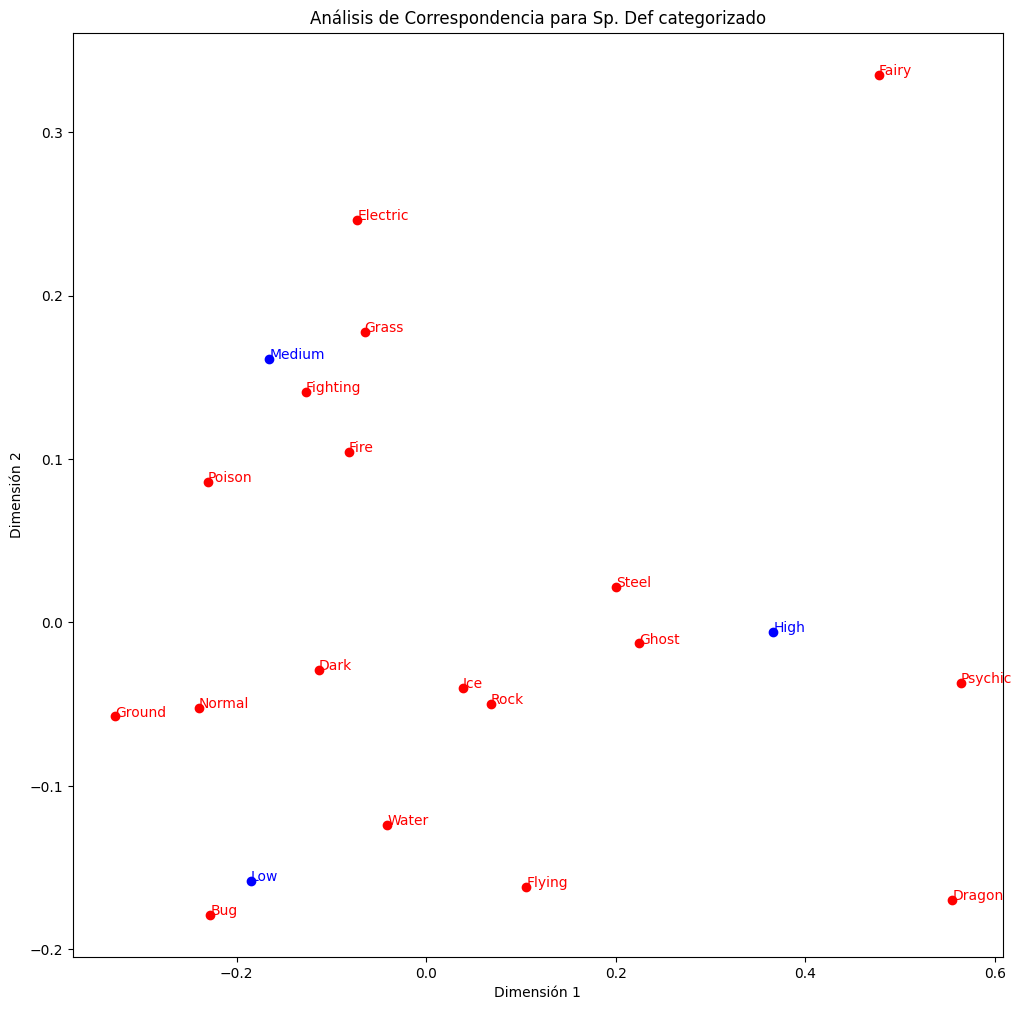

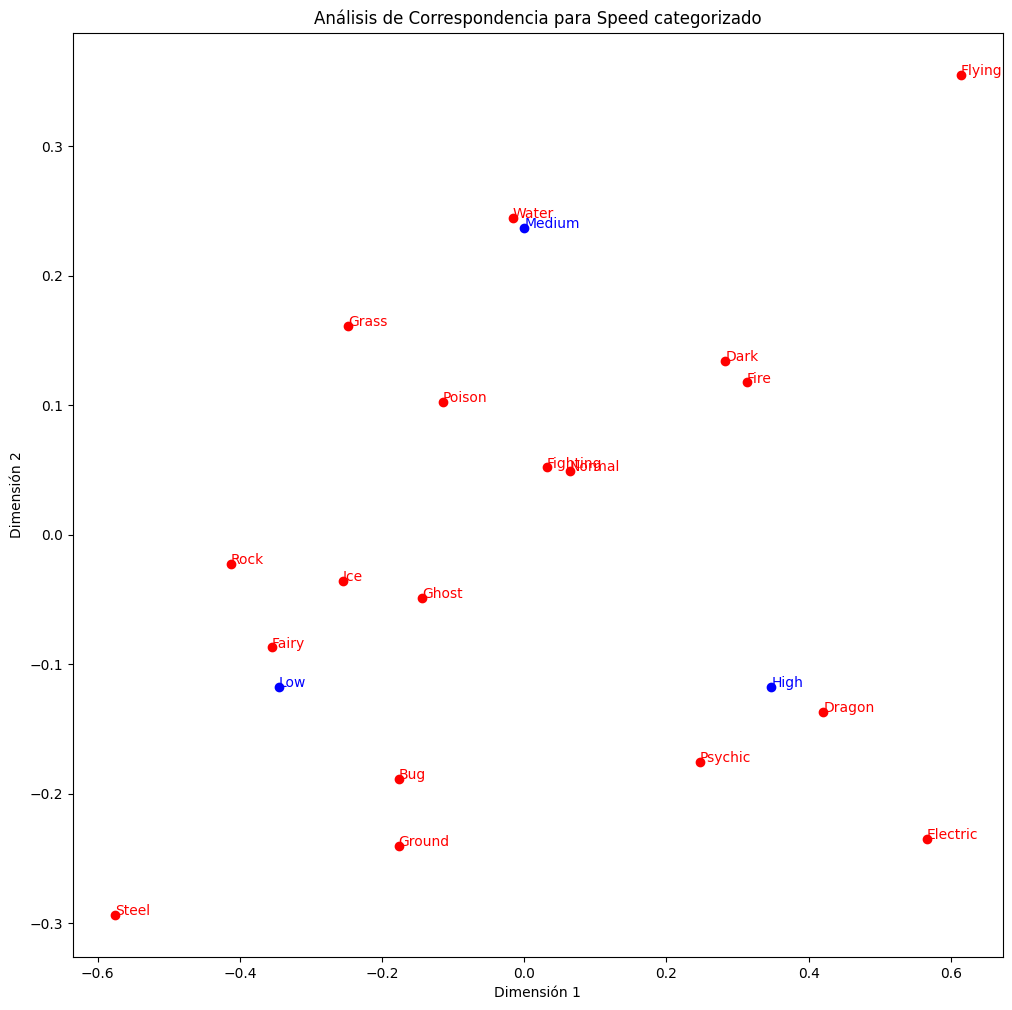

In [18]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Categorizar las estadísticas de combate
categorized_stats = {}
for col in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    pokemon_data[col + '_cat'] = pd.qcut(pokemon_data[col], 3, labels=['Low', 'Medium', 'High'])
    categorized_stats[col] = pd.crosstab(pokemon_data[col + '_cat'], pokemon_data['Type 1'])

# Realizar el análisis de correspondencia para cada estadística de combate
for stat, table in categorized_stats.items():
    ca = prince.CA(n_components=2)
    ca = ca.fit(table)

    # Obtener las coordenadas de fila y columna
    row_coordinates = ca.row_coordinates(table)
    col_coordinates = ca.column_coordinates(table)

    # Visualización con matplotlib
    plt.figure(figsize=(12, 12))

    # Plotear las coordenadas de fila
    for i, (x, y) in enumerate(row_coordinates.values):
        plt.scatter(x, y, c='b')
        plt.text(x, y, row_coordinates.index[i], color='b')

    # Plotear las coordenadas de columna
    for i, (x, y) in enumerate(col_coordinates.values):
        plt.scatter(x, y, c='r')
        plt.text(x, y, col_coordinates.index[i], color='r')

    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.title(f'Análisis de Correspondencia para {stat} categorizado')
    plt.show()
